<a href="https://colab.research.google.com/github/stm010/dsci100/blob/main/midterm1_dci100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F



The following code gives simulated data for the preditor prey model.
Run this code to obtain the data

In [3]:
# The following data is obtained by running the simulation
def lotka_vol(x0, y0, dt, nt):

  X = np.zeros(nt+1)
  Y = np.zeros(nt+1)
  t = np.zeros(nt+1)
  X[0] = x0
  Y[0] = y0

  for i in range(1, nt+1):
    X[i] = X[i-1] + dt * (2/4 * X[i-1] - 4.3 * X[i-1] * Y[i-1])
    Y[i] = Y[i-1] + dt * (-Y[i-1] + X[i] * Y[i-1])
    t[i] = t[i-1] + dt
  return X, Y, t

X, Y, t = lotka_vol(1, 1, 0.01, 5000)

**Question 1[15\%]**
In the next cell make plots of X vs t, Y vs t, and Y vs X

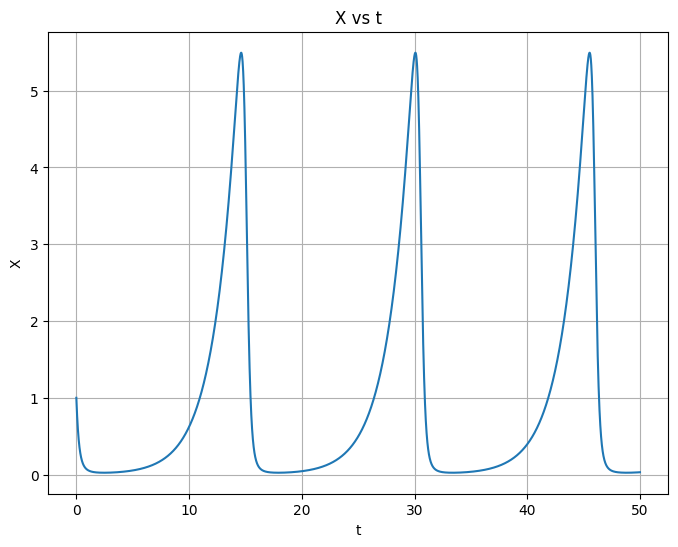

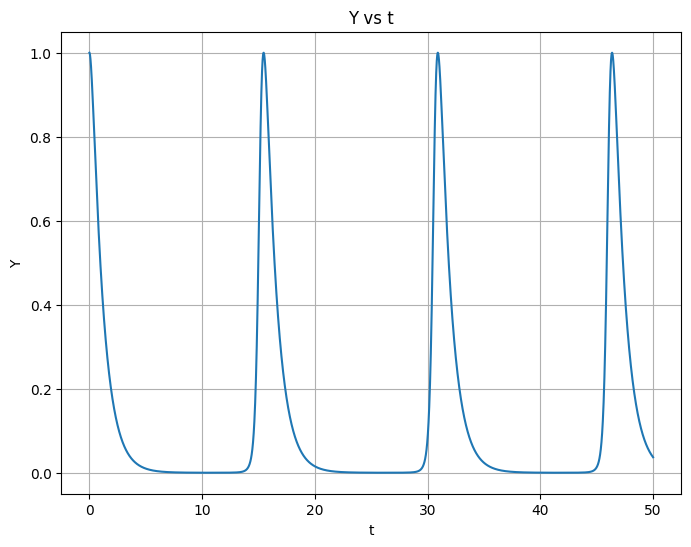

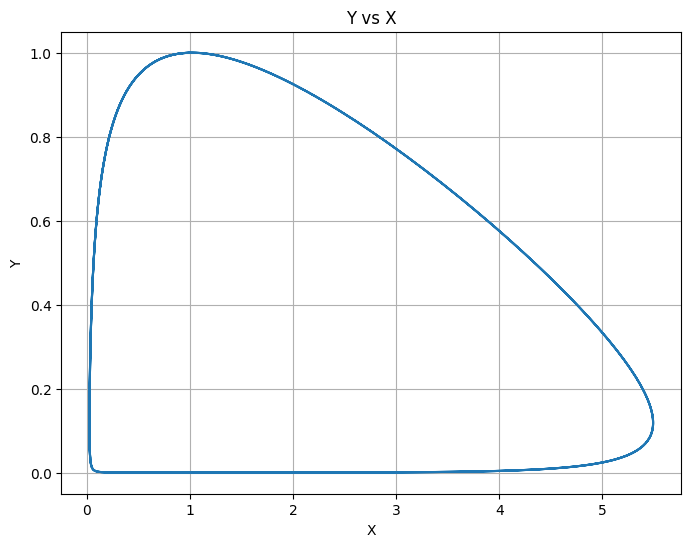

In [18]:
# Plot X vs t
plt.figure(figsize=(8, 6))
plt.plot(t, X)
plt.xlabel('t')
plt.ylabel('X')
plt.title('X vs t')
plt.grid(True)
plt.show()

# Plot Y vs t
plt.figure(figsize=(8, 6))
plt.plot(t, Y)
plt.xlabel('t')
plt.ylabel('Y')
plt.title('Y vs t')
plt.grid(True)
plt.show()

# Plot Y vs X
plt.figure(figsize=(8, 6))
plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y vs X')
plt.grid(True)
plt.show()

**Question 2[15\%]:**
The following 4 models have been proposed to fit the data.
Which one do you think is the best and why (20 words max)

1. A linear model $X = a_0 + a_1t$

2. A quadratic model  $X(t) = a_0 + a_1t + a_2t^2$

3. An exponential model  $X(t) = a_0 + a_1 \exp(t) + a_2exp(-t)$

4. A model that involves trigonometric functions
$ X(t) = a_0 + a_1 \cos(w_1t) + a_2\cos(w_2t) + a_3 \cos(w_3t) + a_4\cos(w_3t)$  

5. A mixture of Gaussians
$ X(t) = \sum \exp( -w_i(t-c_i)^2) $


Model 4 best fits X(t). The X vs t plot exhibits oscillations that can be reflected with trigonometric functions.

**Question 3[70\%]:**
We are going to use the Gaussian model to fit the data.
We assume that

c = [-0.3032, 13.9566, 29.4172, 44.8748]

w = [1.1065, 0.3398, 0.3465, 0.3527]

**3.1[40\%].** Set up a linear system of equations (matrix and right hand side) to solve for the coefficients $a$

**3.2[10\%].** Using np.linalg.lstsq solve the system

**3.3[10\%].** Use the coefficients you calculated below and plot the function and its approximation


**3.4[10\%].** Comment, is this a good approximation? Why?




In [19]:
### full solution in last code cell ###

# 3.1
# Your code to setup the matrix here

# setting up linear system of equations

A = np.zeros((len(t), 4))
c = np.array([-0.3032, 13.9566, 29.4172, 44.8748])
w = np.array([1.1065, 0.3398, 0.3465, 0.3527])

#create matrix A
for i in range(4):
  A[:, i] = phi(t, c[i], w[i])

b = X

In [16]:
# 3.2
# Your code to solve for a here

#solve for coefficients
a = np.linalg.lstsq(A, b, rcond=None)[0]
print('coefficients = ', a)

coefficients =  [0.62855158 4.59289552 4.61630839 4.63754674]


In [ ]:
# 3.3


# Your code to plot Xp here
def LVapprox(a, t):
  c = np.array([-0.3032, 13.9566, 29.4172, 44.8748])
  w = np.array([1.1065, 0.3398, 0.3465, 0.3527])
  Xp = a[0]*phi(t, c[0], w[0]) + a[1]*phi(t, c[1], w[1]) + a[2]*phi(t, c[2], w[2]) + a[3]*phi(t, c[3], w[3])
  return Xp

Xp = LVapprox(a, t)
plt.plot(t, X, t, Xp)

3.4

I think the approximation is reasonably good, but further information is needed to confirm.

Visual Examination: The approximation plot (Xp) reasonably follows the actual data (X) but exhibits slight lag and lower peak values. Given the context of a predator prey model, I am unsure if these discrepancies are significant enough to deem Xp as a poor fit.

Quantitative Examination: A low MSE value indicates a better fit while a greater value indicates significant deviations from X. Calculating an MSE value of approx. 0.27, I believe that this indicates a good fit. However, further information regarding the typical threshold given the context of this predator prey model will be helpful in confirming this.

coefficients =  [0.62855158 4.59289552 4.61630839 4.63754674]
Mean Squared Error =  0.2687683670682105


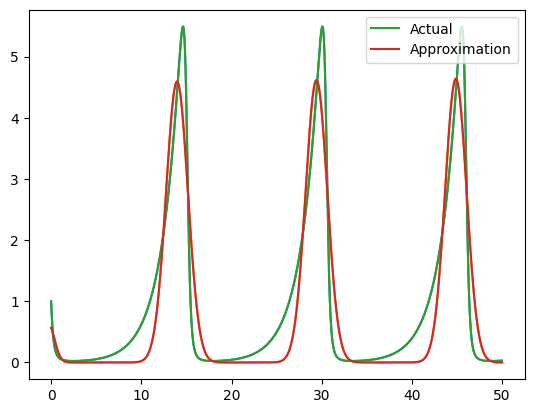

In [17]:
# Change this cell for the solution
def phi(x, c, w):
  return np.exp(-w*(x-c)**2)

def LVapprox(a, t):
  c = np.array([-0.3032, 13.9566, 29.4172, 44.8748])
  w = np.array([1.1065, 0.3398, 0.3465, 0.3527])
  Xp = a[0]*phi(t, c[0], w[0]) + a[1]*phi(t, c[1], w[1]) + a[2]*phi(t, c[2], w[2]) + a[3]*phi(t, c[3], w[3])
  return Xp

#a = np.array([0,0,0,0.0]) # Change values here based on your results
A = np.zeros((len(t), 4))
c = np.array([-0.3032, 13.9566, 29.4172, 44.8748])
w = np.array([1.1065, 0.3398, 0.3465, 0.3527])

#create matrix A
for i in range(4):
  A[:, i] = phi(t, c[i], w[i])

b = X

#solve for coefficients
a = np.linalg.lstsq(A, b, rcond=None)[0]
print('coefficients = ', a)

Xp = LVapprox(a, t)
res = X - Xp
print('Mean Squared Error = ', ((res**2).mean().item()))

# Your code to plot Xp here
plt.plot(t, X, t, Xp)

plt.plot(t, X, label = 'Actual')
plt.plot(t, Xp, label = 'Approximation')
plt.legend()
plt.show()

In [8]:
a

array([0., 0., 0., 0.])